In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import pickle

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv


In [2]:
# for clear /kaggle/working
#!rm -rf /kaggle/working/*

In [3]:
daily_data_df = pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv')
submission_df = pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv')

In [4]:
daily_data_df.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


In [5]:
daily_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    2893 non-null   object 
 1   city_id                   2893 non-null   object 
 2   temperature_celsius       2893 non-null   float64
 3   condition_text            479 non-null    object 
 4   wind_kph                  2893 non-null   float64
 5   wind_degree               2893 non-null   int64  
 6   pressure_mb               2893 non-null   float64
 7   precip_mm                 2893 non-null   float64
 8   humidity                  2893 non-null   int64  
 9   cloud                     2893 non-null   int64  
 10  feels_like_celsius        2893 non-null   float64
 11  visibility_km             2893 non-null   float64
 12  uv_index                  2893 non-null   float64
 13  gust_kph                  2893 non-null   float64
 14  air_qual

In [6]:
daily_data_df.isnull().sum()

day_id                         0
city_id                        0
temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
sunrise                        0
sunset                         0
dtype: int64

In [7]:
del daily_data_df['day_id']
del daily_data_df['city_id']
del daily_data_df['sunrise']
del daily_data_df['sunset']

daily_data_df.head()

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
0,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2
1,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1
2,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1
3,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1
4,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1


In [8]:
missing_values_df = daily_data_df[daily_data_df['condition_text'].isnull()]

missing_values_df.head()

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
0,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2
1,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1
4,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1
5,20.0,NaN,3.6,96,1019.0,0.0,88,0,20.0,10.0,1.0,11.2,1
7,21.0,NaN,20.2,330,1011.0,0.0,53,75,21.0,10.0,1.0,17.3,1


In [9]:
del missing_values_df['condition_text']

missing_values_df.head()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
0,27.0,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2
1,22.0,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1
4,18.0,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1
5,20.0,3.6,96,1019.0,0.0,88,0,20.0,10.0,1.0,11.2,1
7,21.0,20.2,330,1011.0,0.0,53,75,21.0,10.0,1.0,17.3,1


In [10]:
without_missing_values_df = daily_data_df.dropna(subset=['condition_text'])

without_missing_values_df.head()

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
2,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1
3,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1
6,21.0,Partly Cloudy,4.0,310,1015.0,0.0,100,50,21.0,10.0,1.0,15.1,2
18,19.0,Clear and Sunny,3.6,64,1017.0,0.0,88,0,19.0,10.0,1.0,8.3,3
27,19.0,Partly Cloudy,3.6,83,1010.0,0.0,73,25,19.0,10.0,1.0,8.3,1


In [11]:
print(f"daily_data_df: {daily_data_df.shape}\nmissing_values_df: {missing_values_df.shape}\nwithout_missing_values_df: {without_missing_values_df.shape}")

daily_data_df: (2893, 13)
missing_values_df: (2414, 12)
without_missing_values_df: (479, 13)


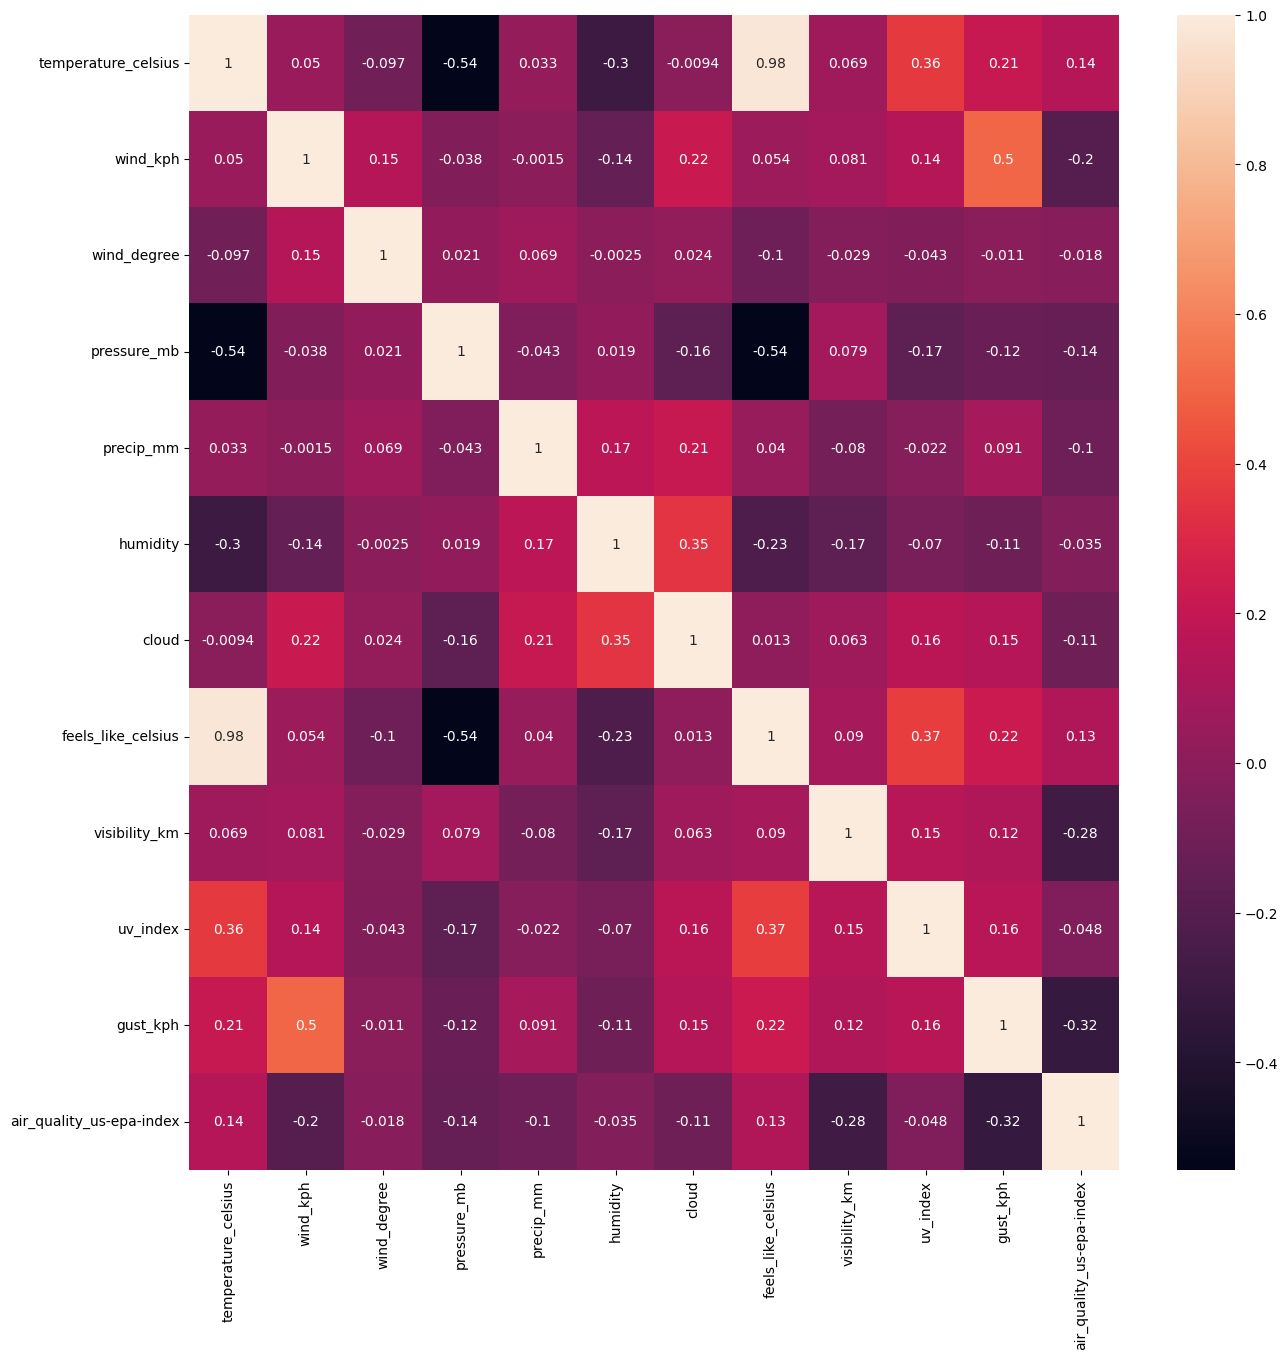

In [12]:
fig = plt.figure(figsize = (15, 15))
ax = fig.gca()
correlations = without_missing_values_df[['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index']].corr(method = 'pearson')
sns.heatmap(correlations, annot = True, ax = ax)

plt.show()

In [13]:
correlations_df = pd.DataFrame(correlations)
correlations_text_values_df = correlations_df.to_string()
print(correlations_text_values_df)

                          temperature_celsius  wind_kph  wind_degree  pressure_mb  precip_mm  humidity     cloud  feels_like_celsius  visibility_km  uv_index  gust_kph  air_quality_us-epa-index
temperature_celsius                  1.000000  0.049785    -0.096616    -0.543330   0.033135 -0.298868 -0.009363            0.979205       0.068919  0.361346  0.212524                  0.141209
wind_kph                             0.049785  1.000000     0.145187    -0.037853  -0.001528 -0.142019  0.219424            0.053889       0.081260  0.141954  0.502903                 -0.199409
wind_degree                         -0.096616  0.145187     1.000000     0.021139   0.069292 -0.002489  0.023723           -0.103716      -0.029315 -0.042774 -0.010668                 -0.017973
pressure_mb                         -0.543330 -0.037853     0.021139     1.000000  -0.043063  0.018685 -0.164476           -0.539716       0.078649 -0.165569 -0.123333                 -0.136278
precip_mm                     

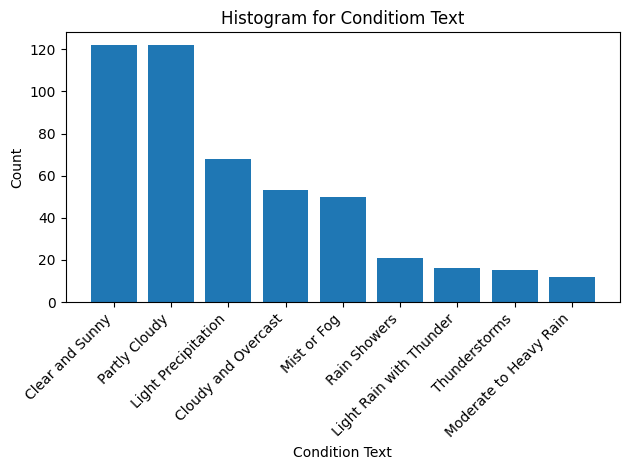

In [14]:
condition_counts = without_missing_values_df['condition_text'].value_counts()
condition_counts = condition_counts.sort_values(ascending=False)

plt.bar(condition_counts.index, condition_counts.values)
plt.xlabel("Condition Text")
plt.ylabel("Count")
plt.title("Histogram for Conditiom Text")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

In [15]:
condition_counts = without_missing_values_df['condition_text'].value_counts()
frequency_table = pd.DataFrame({'Condition Text': condition_counts.index, 'Frequency': condition_counts.values})

print(frequency_table)

            Condition Text  Frequency
0          Clear and Sunny        122
1            Partly Cloudy        122
2      Light Precipitation         68
3      Cloudy and Overcast         53
4              Mist or Fog         50
5             Rain Showers         21
6  Light Rain with Thunder         16
7            Thunderstorms         15
8   Moderate to Heavy Rain         12


In [16]:
scaler = StandardScaler()

array = without_missing_values_df[['air_quality_us-epa-index']].values
scaled_data = scaler.fit_transform(array)
without_missing_values_df['air_quality_us-epa-index_transform'] = scaled_data

wind_kph_array = without_missing_values_df[['wind_kph']].values
wind_kph_scaled_data = scaler.fit_transform(wind_kph_array)
without_missing_values_df['wind_kph_transform'] = wind_kph_scaled_data

wind_degree_array = without_missing_values_df[['wind_degree']].values
wind_degree_scaled_data = scaler.fit_transform(wind_degree_array)
without_missing_values_df['wind_degree_transform'] = wind_degree_scaled_data

pressure_mb_array = without_missing_values_df[['pressure_mb']].values
pressure_mb_scaled_data = scaler.fit_transform(pressure_mb_array)
without_missing_values_df['pressure_mb_transform'] = pressure_mb_scaled_data

precip_mm_array = without_missing_values_df[['precip_mm']].values
precip_mm_scaled_data = scaler.fit_transform(precip_mm_array)
without_missing_values_df['precip_mm_transform'] = precip_mm_scaled_data

humidity_array = without_missing_values_df[['humidity']].values
humidity_scaled_data = scaler.fit_transform(humidity_array)
without_missing_values_df['humidity_transform'] = humidity_scaled_data

cloud_array = without_missing_values_df[['cloud']].values
cloud_scaled_data = scaler.fit_transform(cloud_array)
without_missing_values_df['cloud_transform'] = cloud_scaled_data

feels_like_celsius_array = without_missing_values_df[['feels_like_celsius']].values
feels_like_celsius_scaled_data = scaler.fit_transform(feels_like_celsius_array)
without_missing_values_df['feels_like_celsius_transform'] = feels_like_celsius_scaled_data

visibility_km_array = without_missing_values_df[['visibility_km']].values
visibility_km_scaled_data = scaler.fit_transform(visibility_km_array)
without_missing_values_df['visibility_km_transform'] = visibility_km_scaled_data

uv_index_array = without_missing_values_df[['uv_index']].values
uv_index_scaled_data = scaler.fit_transform(uv_index_array)
without_missing_values_df['uv_index_transform'] = uv_index_scaled_data

gust_kph_array = without_missing_values_df[['gust_kph']].values
gust_kph_scaled_data = scaler.fit_transform(gust_kph_array)
without_missing_values_df['gust_kph_transform'] = gust_kph_scaled_data

temperature_celsius_array = without_missing_values_df[['temperature_celsius']].values
temperature_celsius_scaled_data = scaler.fit_transform(temperature_celsius_array)
without_missing_values_df['temperature_celsius_transform'] = temperature_celsius_scaled_data

In [17]:
without_missing_values_df.head()

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,...,wind_degree_transform,pressure_mb_transform,precip_mm_transform,humidity_transform,cloud_transform,feels_like_celsius_transform,visibility_km_transform,uv_index_transform,gust_kph_transform,temperature_celsius_transform
2,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,...,-1.491115,-0.345813,3.808121,1.160612,0.802314,-0.442245,0.187573,-0.560011,-0.466108,-0.325687
3,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,...,-0.084787,0.802218,-0.246614,0.506188,-1.269057,-0.791270,0.187573,-0.560011,-0.594301,-0.791186
6,21.0,Partly Cloudy,4.0,310,1015.0,0.0,100,50,21.0,10.0,...,1.522446,0.310205,-0.246614,1.160612,0.111857,-0.325903,0.187573,-0.560011,-0.237193,-0.170521
18,19.0,Clear and Sunny,3.6,64,1017.0,0.0,88,0,19.0,10.0,...,-0.948674,0.638214,-0.246614,0.506188,-1.269057,-0.558586,0.187573,-0.560011,-0.859843,-0.480854
27,19.0,Partly Cloudy,3.6,83,1010.0,0.0,73,25,19.0,10.0,...,-0.757815,-0.509818,-0.246614,-0.311842,-0.578600,-0.558586,0.187573,-0.560011,-0.859843,-0.480854


In [18]:
without_missing_values_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 2 to 2888
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temperature_celsius                 479 non-null    float64
 1   condition_text                      479 non-null    object 
 2   wind_kph                            479 non-null    float64
 3   wind_degree                         479 non-null    int64  
 4   pressure_mb                         479 non-null    float64
 5   precip_mm                           479 non-null    float64
 6   humidity                            479 non-null    int64  
 7   cloud                               479 non-null    int64  
 8   feels_like_celsius                  479 non-null    float64
 9   visibility_km                       479 non-null    float64
 10  uv_index                            479 non-null    float64
 11  gust_kph                            479 non-null 

In [19]:
selected_columns = ["temperature_celsius_transform", "condition_text", "wind_kph_transform", "wind_degree_transform", "pressure_mb_transform", "precip_mm_transform", "humidity_transform", "cloud_transform", "feels_like_celsius_transform", "visibility_km_transform", "uv_index_transform", "gust_kph_transform", "air_quality_us-epa-index_transform"]

transformed_data_df = without_missing_values_df[selected_columns]

transformed_data_df.head(10)

,temperature_celsius_transform,condition_text,wind_kph_transform,wind_degree_transform,pressure_mb_transform,precip_mm_transform,humidity_transform,cloud_transform,feels_like_celsius_transform,visibility_km_transform,uv_index_transform,gust_kph_transform,air_quality_us-epa-index_transform
2,-0.325687,Light Rain with Thunder,-0.976376,-1.491115,-0.345813,3.808121,1.160612,0.802314,-0.442245,0.187573,-0.560011,-0.466108,-0.562029
3,-0.791186,Clear and Sunny,-0.634911,-0.084787,0.802218,-0.246614,0.506188,-1.269057,-0.791270,0.187573,-0.560011,-0.594301,-0.562029
6,-0.170521,Partly Cloudy,-0.921742,1.522446,0.310205,-0.246614,1.160612,0.111857,-0.325903,0.187573,-0.560011,-0.237193,0.281896
18,-0.480854,Clear and Sunny,-0.976376,-0.948674,0.638214,-0.246614,0.506188,-1.269057,-0.558586,0.187573,-0.560011,-0.859843,1.125820
27,-0.480854,Partly Cloudy,-0.976376,-0.757815,-0.509818,-0.246614,-0.311842,-0.578600,-0.558586,0.187573,-0.560011,-0.859843,-0.562029
34,0.450144,Partly Cloudy,-0.634911,-0.888403,0.310205,-0.246614,0.233511,-0.578600,0.372148,0.187573,-0.560011,-0.035747,-0.562029
41,0.450144,Light Rain with Thunder,-0.976376,-0.175193,0.474209,-0.246614,0.233511,0.111857,0.290709,-0.438541,-0.560011,-0.301289,-0.562029
78,1.070809,Light Precipitation,0.594363,-0.687499,0.310205,0.023702,0.015370,0.802314,1.186541,0.187573,-0.560011,1.804734,-0.562029
80,1.070809,Cloudy and Overcast,0.594363,-0.587047,0.310205,-0.156508,0.015370,0.111857,1.198175,0.187573,-0.560011,1.447626,-0.562029
86,0.760477,Cloudy and Overcast,-0.634911,-0.587047,0.310205,-0.156508,0.015370,0.443276,0.709539,0.187573,-0.560011,1.282807,-0.562029


In [20]:
data_X = transformed_data_df.drop('condition_text', axis=1)
data_Y = transformed_data_df['condition_text']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X,
                                                    data_Y,
                                                    test_size=0.2,
                                                    random_state=42)

In [22]:
rf_classifier = RandomForestClassifier(random_state=42)

In [23]:
rf_model = rf_classifier.fit(X_train, Y_train)

In [24]:
with open('rf_classifier.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [25]:
import pickle

# Load the trained model from file
with open('rf_classifier.pkl', 'rb') as f:
    rf_model = pickle.load(f)

In [26]:
scaler = StandardScaler()

array = missing_values_df[['air_quality_us-epa-index']].values
scaled_data = scaler.fit_transform(array)
missing_values_df['air_quality_us-epa-index_transform'] = scaled_data

wind_kph_array = missing_values_df[['wind_kph']].values
wind_kph_scaled_data = scaler.fit_transform(wind_kph_array)
missing_values_df['wind_kph_transform'] = wind_kph_scaled_data

wind_degree_array = missing_values_df[['wind_degree']].values
wind_degree_scaled_data = scaler.fit_transform(wind_degree_array)
missing_values_df['wind_degree_transform'] = wind_degree_scaled_data

pressure_mb_array = missing_values_df[['pressure_mb']].values
pressure_mb_scaled_data = scaler.fit_transform(pressure_mb_array)
missing_values_df['pressure_mb_transform'] = pressure_mb_scaled_data

precip_mm_array =missing_values_df[['precip_mm']].values
precip_mm_scaled_data = scaler.fit_transform(precip_mm_array)
missing_values_df['precip_mm_transform'] = precip_mm_scaled_data

humidity_array = missing_values_df[['humidity']].values
humidity_scaled_data = scaler.fit_transform(humidity_array)
missing_values_df['humidity_transform'] = humidity_scaled_data

cloud_array = missing_values_df[['cloud']].values
cloud_scaled_data = scaler.fit_transform(cloud_array)
missing_values_df['cloud_transform'] = cloud_scaled_data

feels_like_celsius_array = missing_values_df[['feels_like_celsius']].values
feels_like_celsius_scaled_data = scaler.fit_transform(feels_like_celsius_array)
missing_values_df['feels_like_celsius_transform'] = feels_like_celsius_scaled_data

visibility_km_array = missing_values_df[['visibility_km']].values
visibility_km_scaled_data = scaler.fit_transform(visibility_km_array)
missing_values_df['visibility_km_transform'] = visibility_km_scaled_data

uv_index_array = missing_values_df[['uv_index']].values
uv_index_scaled_data = scaler.fit_transform(uv_index_array)
missing_values_df['uv_index_transform'] = uv_index_scaled_data

gust_kph_array = missing_values_df[['gust_kph']].values
gust_kph_scaled_data = scaler.fit_transform(gust_kph_array)
missing_values_df['gust_kph_transform'] = gust_kph_scaled_data

temperature_celsius_array = missing_values_df[['temperature_celsius']].values
temperature_celsius_scaled_data = scaler.fit_transform(temperature_celsius_array)
missing_values_df['temperature_celsius_transform'] = temperature_celsius_scaled_data

In [27]:
selected_columns = ["temperature_celsius_transform", "wind_kph_transform", "wind_degree_transform", "pressure_mb_transform", "precip_mm_transform", "humidity_transform", "cloud_transform", "feels_like_celsius_transform", "visibility_km_transform", "uv_index_transform", "gust_kph_transform", "air_quality_us-epa-index_transform"]

prediction_data_df = missing_values_df[selected_columns]

prediction_data_df.head(10)

,temperature_celsius_transform,wind_kph_transform,wind_degree_transform,pressure_mb_transform,precip_mm_transform,humidity_transform,cloud_transform,feels_like_celsius_transform,visibility_km_transform,uv_index_transform,gust_kph_transform,air_quality_us-epa-index_transform
0,0.750691,-0.567957,0.490914,-1.274335,-0.160286,-1.028924,1.469710,0.480294,0.080267,1.680521,-0.466705,0.399947
1,-0.001477,-0.567957,0.105094,-1.274335,-0.160286,-0.051001,1.469710,0.088375,0.080267,-0.540667,0.633171,-0.565525
4,-0.603211,-0.912862,-0.647256,0.830021,-0.160286,1.029862,-0.943332,-0.639473,0.080267,-0.540667,-0.744065,-0.565525
5,-0.302344,-0.912862,-0.608674,0.830021,-0.160286,0.721044,-0.943332,-0.415520,0.080267,-0.540667,-0.533654,-0.565525
7,-0.151910,1.377302,1.648376,-0.464967,-0.160286,-1.080394,1.469710,-0.303543,0.080267,-0.540667,0.049758,-0.565525
8,0.148957,-0.912862,-0.926976,-0.141220,-0.160286,-1.389212,1.469710,0.121968,0.080267,-0.540667,0.355811,-0.565525
9,0.299390,0.673698,1.648376,0.020653,-0.160286,-1.028924,1.469710,0.177957,0.080267,-0.540667,-0.677116,-0.565525
10,0.148957,-0.471384,1.551921,0.020653,-0.160286,-0.874515,-0.943332,0.121968,0.080267,-0.540667,0.183656,-0.565525
11,-0.452777,-0.912862,-0.772648,0.020653,-0.160286,-0.051001,-0.943332,-0.527496,0.080267,-0.540667,0.116707,-0.565525
12,-0.603211,-0.912862,-0.820876,0.182527,-0.160286,0.463696,-0.943332,-0.639473,0.080267,-0.540667,-0.227602,-0.565525


In [28]:
prediction_data = prediction_data_df

predictions = rf_model.predict(prediction_data)

In [29]:
predictions

array(['Light Precipitation', 'Cloudy and Overcast', 'Clear and Sunny',
       ..., 'Clear and Sunny', 'Clear and Sunny', 'Clear and Sunny'],
      dtype=object)

In [30]:
cleaned_submission_df = submission_df.copy()

In [31]:
cleaned_submission_df = cleaned_submission_df[cleaned_submission_df['condition_text'].isnull()]

cleaned_submission_df.head()

,day_id,condition_text
0,D0001,NaN
1,D0002,NaN
4,D0005,NaN
5,D0006,NaN
7,D0008,NaN


In [32]:
cleaned_submission_df['condition_text'] = predictions

cleaned_submission_df.head()

,day_id,condition_text
0,D0001,Light Precipitation
1,D0002,Cloudy and Overcast
4,D0005,Clear and Sunny
5,D0006,Clear and Sunny
7,D0008,Cloudy and Overcast


In [33]:
non_na_submission_df = submission_df.dropna(subset=['condition_text'])

non_na_submission_df.head()

,day_id,condition_text
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
6,D0007,Partly Cloudy
18,D0019,Clear and Sunny
27,D0028,Partly Cloudy


In [34]:
# Merge cleaned_submission_df and non_na_submission_df based on 'day_id'
merged_df = pd.merge(cleaned_submission_df, non_na_submission_df, on='day_id', how='outer', suffixes=('_cleaned', '_non_na'))

# Replace NaN values in 'condition_text_cleaned' with predictions from 'condition_text_non_na'
merged_df['condition_text_cleaned'].fillna(merged_df['condition_text_non_na'], inplace=True)

# Create new cleaned_submission_df with 'day_id' and 'condition_text_cleaned'
new_cleaned_submission_df = merged_df[['day_id', 'condition_text_cleaned']]

# Rename 'condition_text_cleaned' to 'condition_text'
new_cleaned_submission_df.rename(columns={'condition_text_cleaned': 'condition_text'}, inplace=True)

# Display the cleaned_submission_df
new_cleaned_submission_df.head()

,day_id,condition_text
0,D0001,Light Precipitation
1,D0002,Cloudy and Overcast
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,Clear and Sunny


In [35]:
new_cleaned_submission_df.to_csv('P245.csv', index=False)